In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


## Diccionario de Datos:

- fixed acidity: Acidez fija en g/dm³.
- volatile acidity: Acidez volátil en g/dm³.
- citric acid: Ácido cítrico en g/dm³.
- residual sugar: Azúcar residual en g/dm³.
- chlorides: Cloruros en g/dm³.
- free sulfur dioxide: Dióxido de azufre libre en mg/dm³.
- total sulfur dioxide: Dióxido de azufre total en mg/dm³.
- density: Densidad en g/cm³.
- pH: Nivel de pH.
- sulphates: Sulfatos en g/dm³.
- alcohol: Porcentaje de alcohol en % vol.
- quality: Calidad del vino (variable objetivo, escala de 0 a 10).

# Limpieza y carga de datos 

- Carga de datos

In [132]:

dfr =  pd.read_csv('../../../data/wine_quality/winequality-red.csv')
dfb =  pd.read_csv('../../../data/wine_quality/winequality-white.csv')

# Vino rojo
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [133]:
#Vino blanco
dfb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- identificacion y eliminacion de valores duplicados

In [134]:

duplicados = dfr.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados en dataset vino rojo: {num_duplicados}")

duplicados = dfb.duplicated()
num_duplicadosb = duplicados.sum()
print(f"Número de registros duplicados en dataset vino blanco: {num_duplicadosb}")

dfr = dfr.drop_duplicates()
dfb = dfb = dfb.drop_duplicates()


Número de registros duplicados en dataset vino rojo: 240
Número de registros duplicados en dataset vino blanco: 937


* Verificacion y ajuste de tipos de datos

In [135]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [136]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


No se requiere ajuste, en ambos datasets las variables estan con su tipo adecuado

* Correccion de inconsistencias en valores categoricos

Ambos datasets solo contienen variables numericas, por lo que no existen variables categoricas

* Manejo de valores faltantes 

In [137]:
# Valores faltantes en dataset vino rojo

qsna=dfr.shape[0]-dfr.isnull().sum(axis=0)
qna=dfr.isnull().sum(axis=0)
ppna=round(100*(dfr.isnull().sum(axis=0)/dfr.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1359,0,0.0
volatile acidity,1359,0,0.0
citric acid,1359,0,0.0
residual sugar,1359,0,0.0
chlorides,1359,0,0.0
free sulfur dioxide,1359,0,0.0
total sulfur dioxide,1359,0,0.0
density,1359,0,0.0
pH,1359,0,0.0
sulphates,1359,0,0.0


In [138]:
# Valores faltantes en dataset vino blanco

qsna=dfb.shape[0]-dfr.isnull().sum(axis=0)
qna=dfb.isnull().sum(axis=0)
ppna=round(100*(dfb.isnull().sum(axis=0)/dfb.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,3961,0,0.0
volatile acidity,3961,0,0.0
citric acid,3961,0,0.0
residual sugar,3961,0,0.0
chlorides,3961,0,0.0
free sulfur dioxide,3961,0,0.0
total sulfur dioxide,3961,0,0.0
density,3961,0,0.0
pH,3961,0,0.0
sulphates,3961,0,0.0


Ambos datasets estan completos y no tienen valores faltantes

# Exploracion de datos

* Estadisticas descriptivas

In [139]:
# Vino rojo
dfr.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [140]:
# Vino blanco
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


* Visualizaciones univariadas

Histogramas para variables numericas (vino rojo)

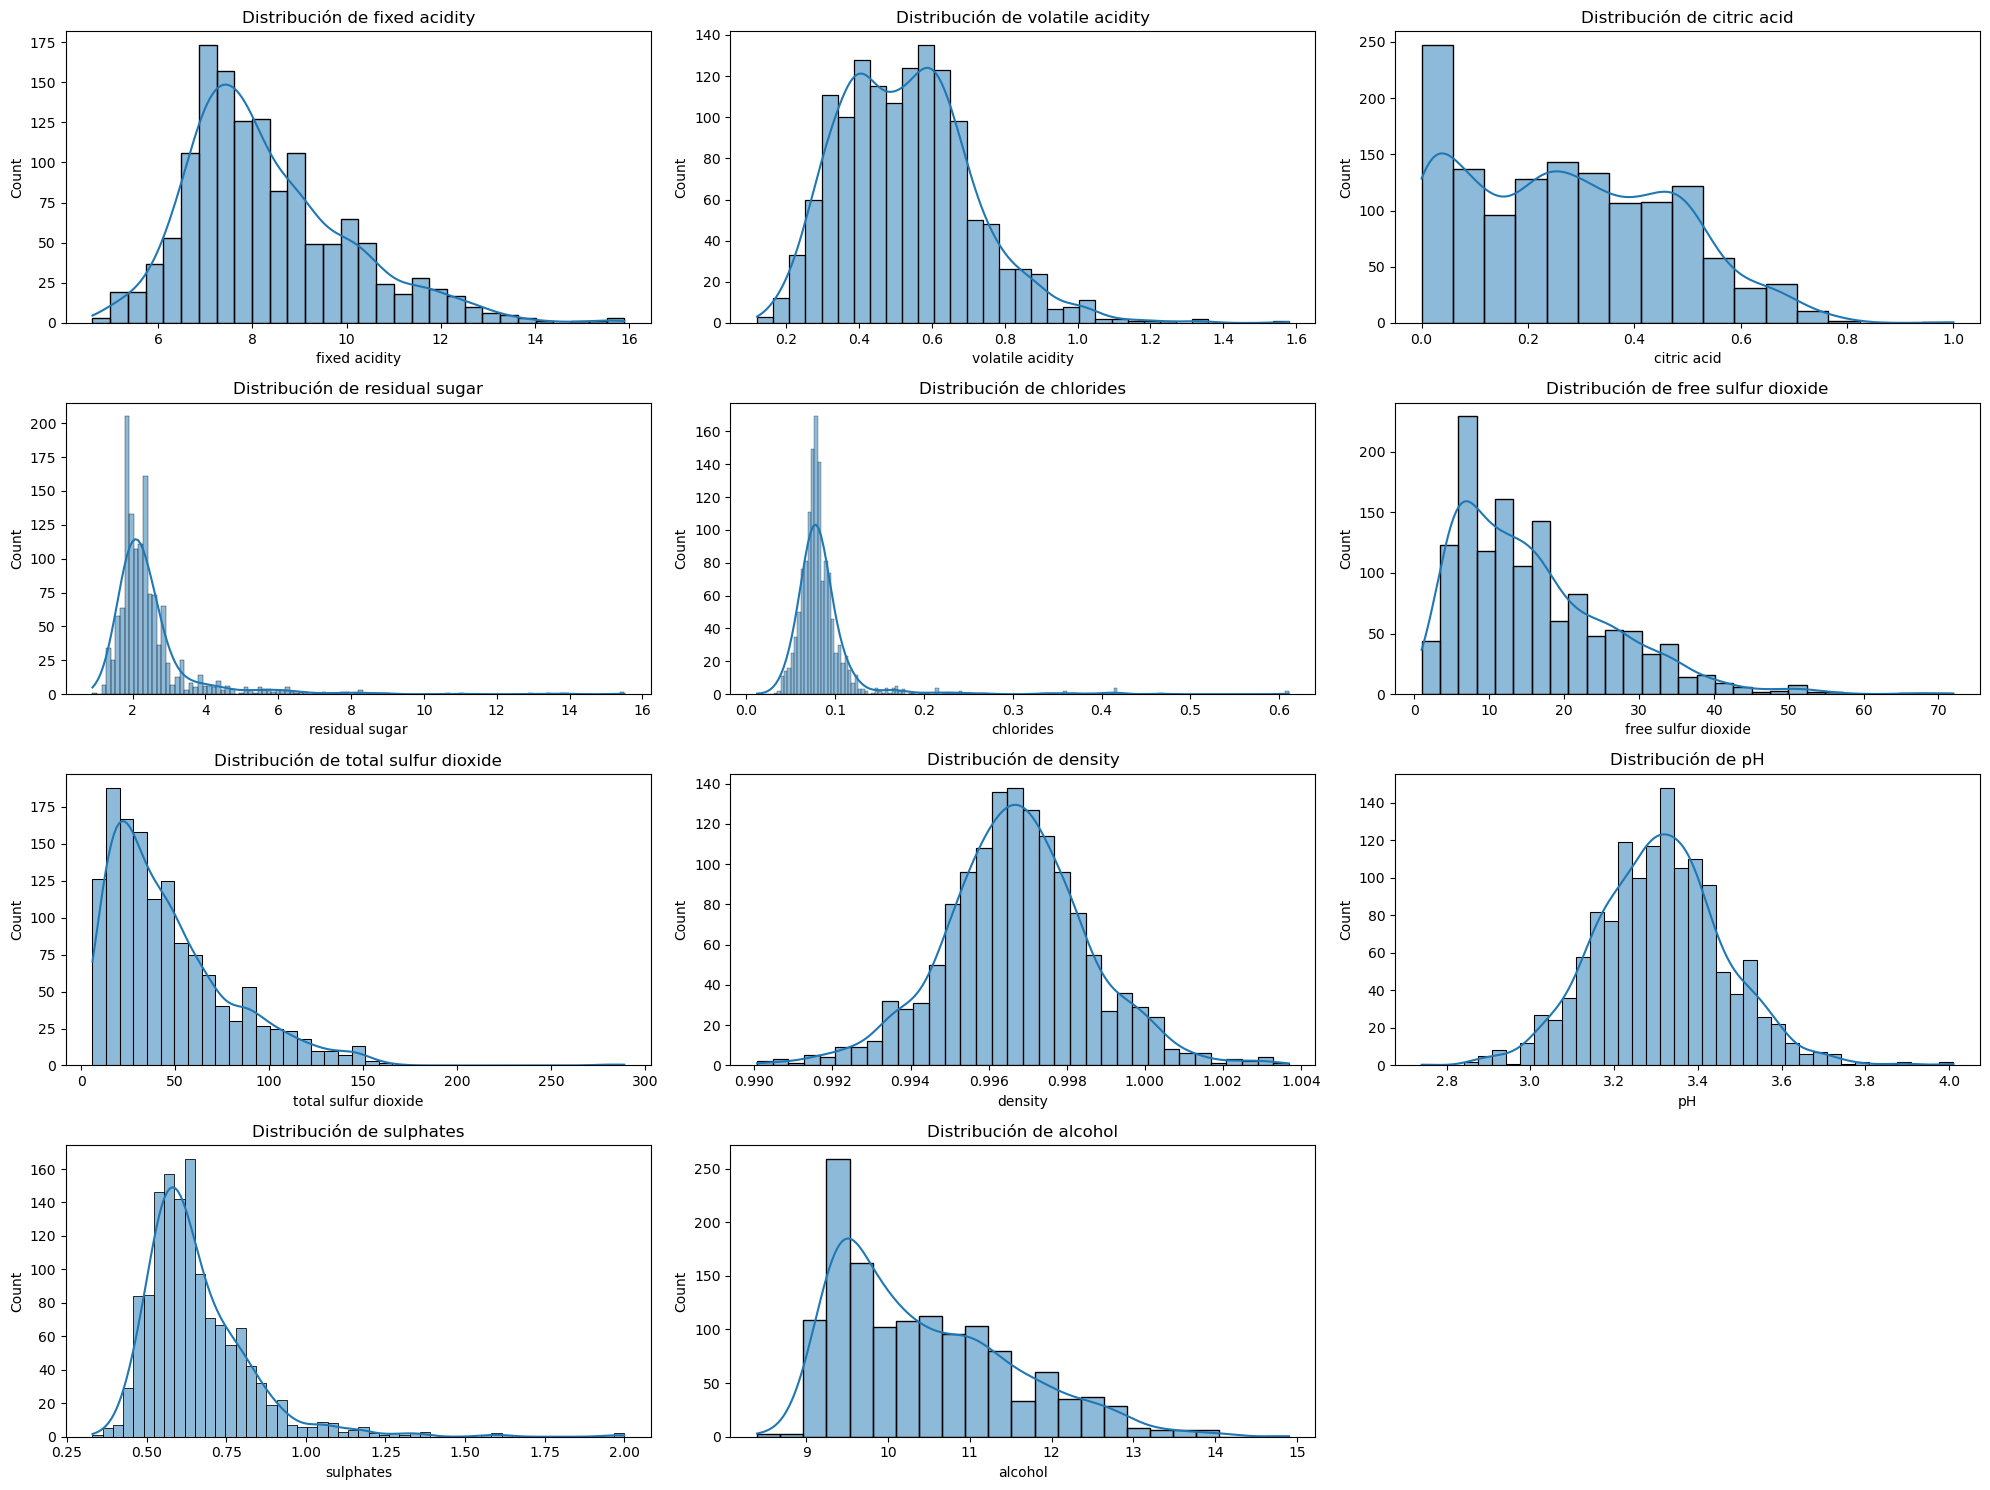

In [141]:
plt.figure(figsize=(20, 15))

# Histogramas para características numéricas
numeric_features = dfr.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('quality')

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(dfr[feature], kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()
plt.close()
    

Histogramas para variables numericas (vino blanco)

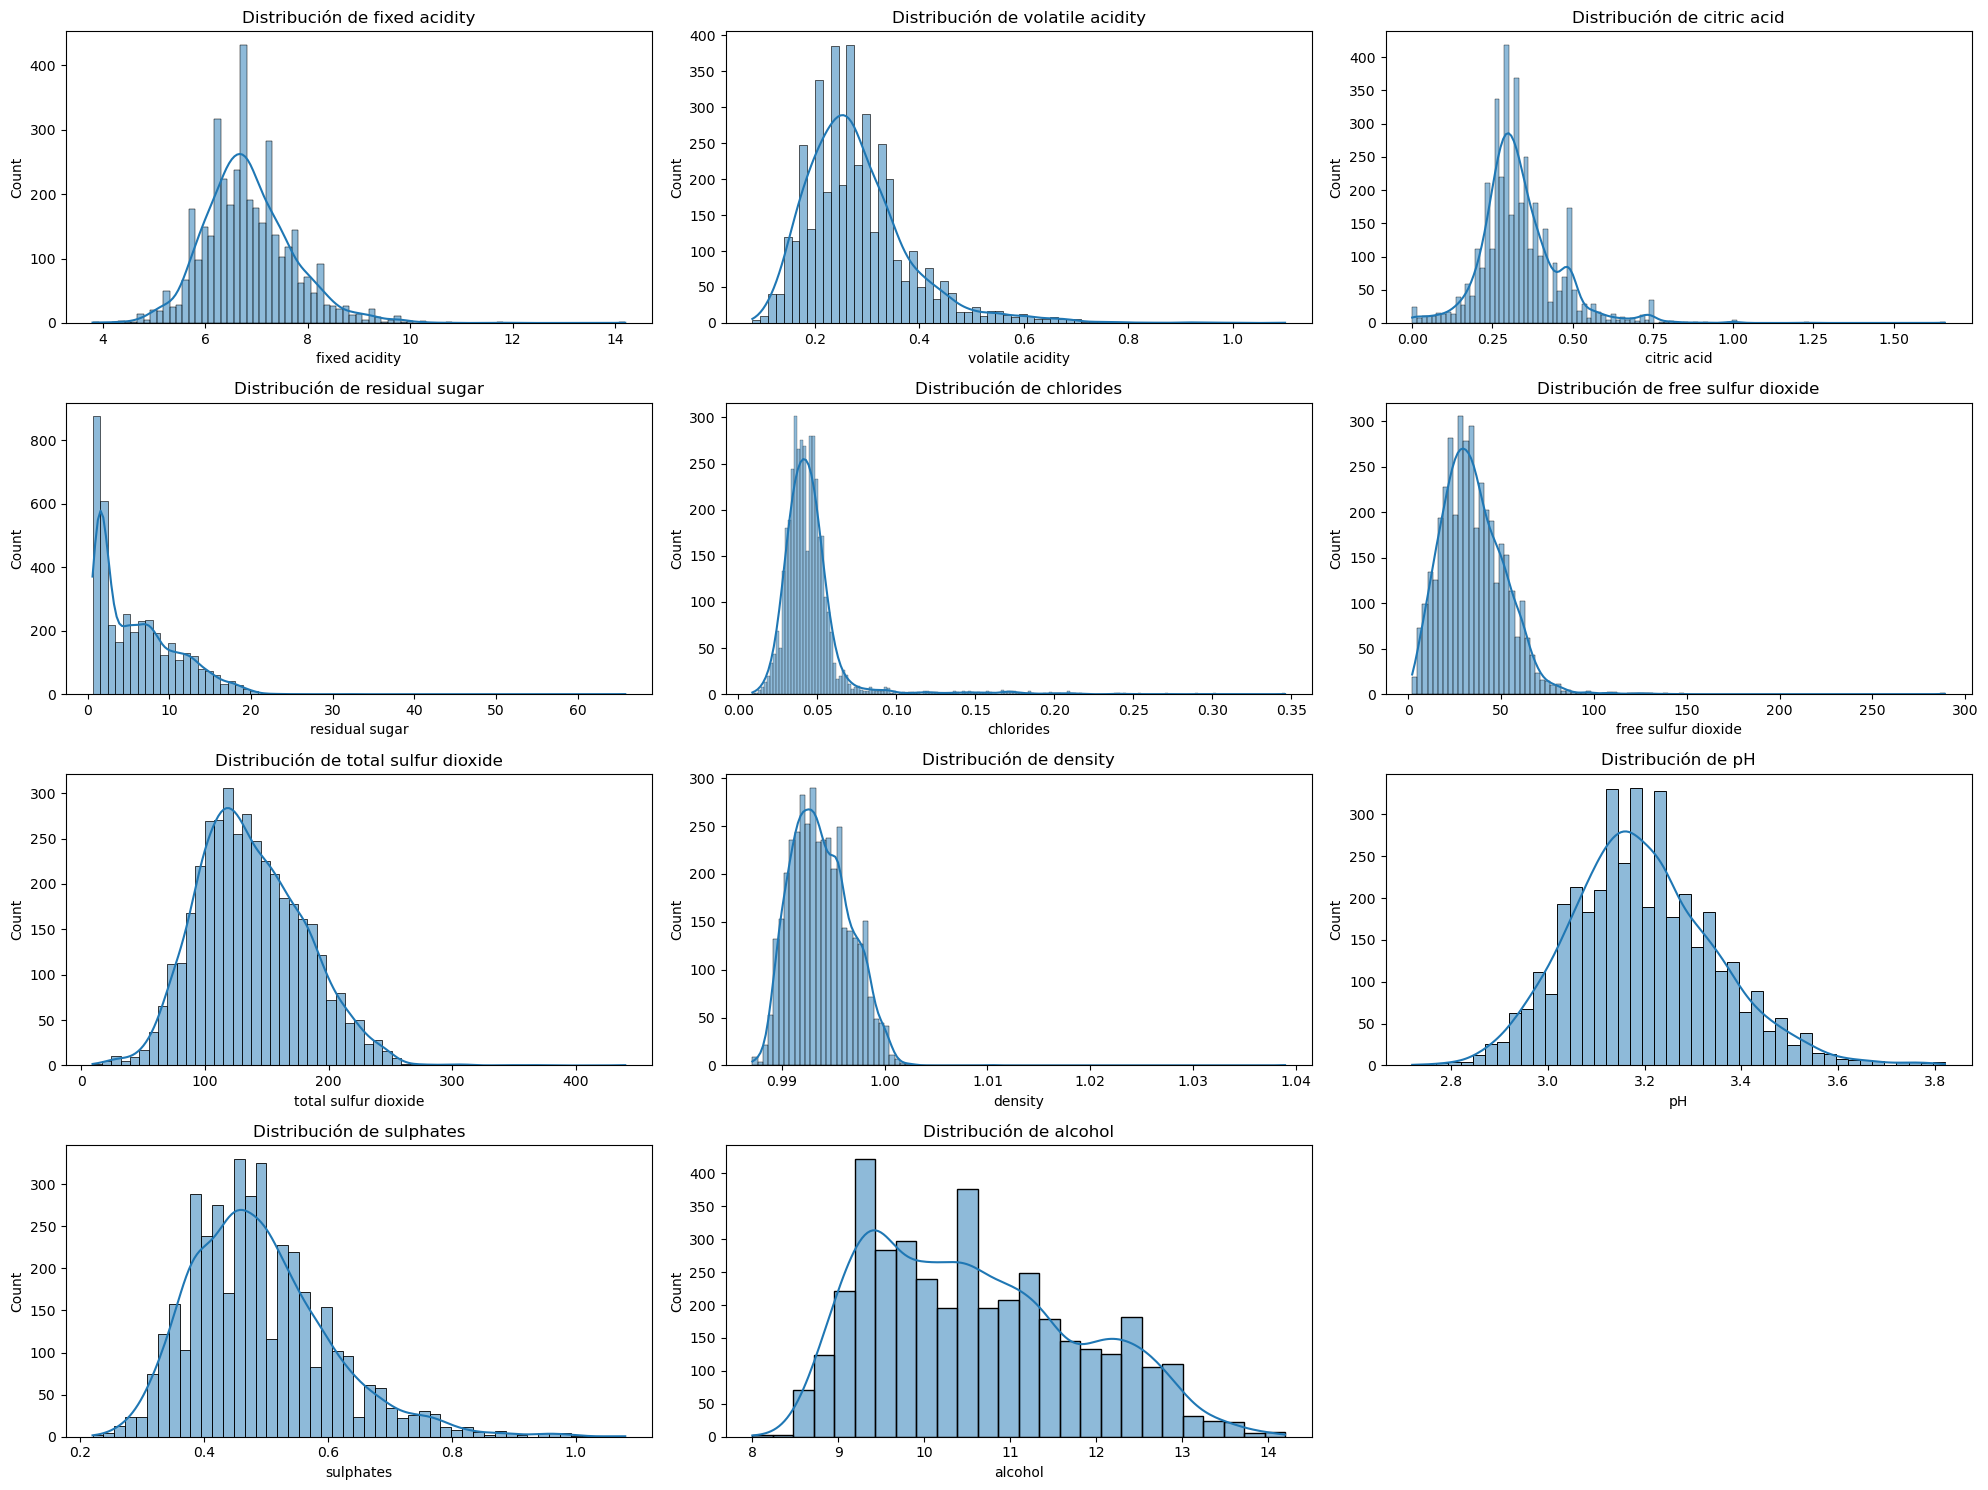

In [142]:
plt.figure(figsize=(20, 15))

# Histogramas para características numéricas
numeric_features = dfb.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('quality')

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(dfb[feature], kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()
plt.close()

* Visualizaciones multivariadas

Vino rojo

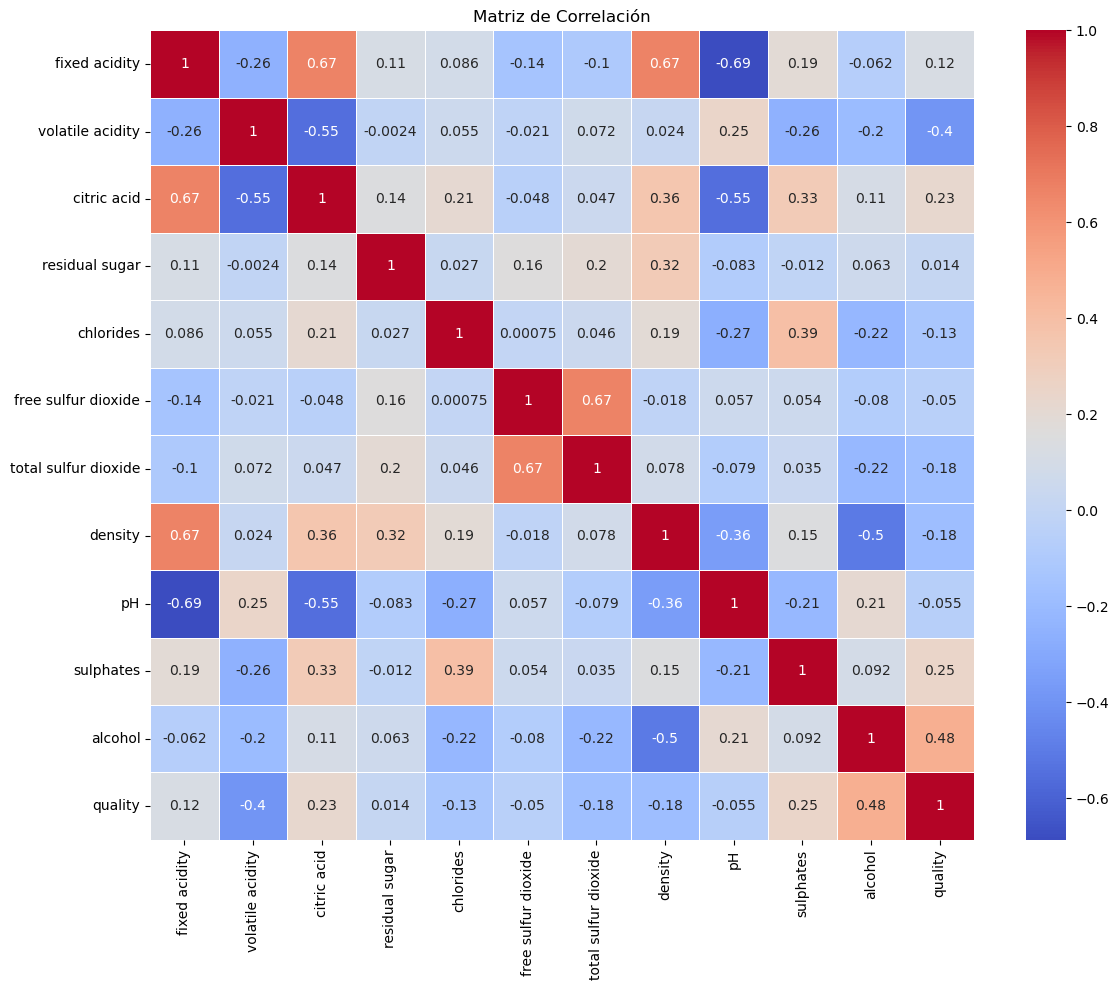

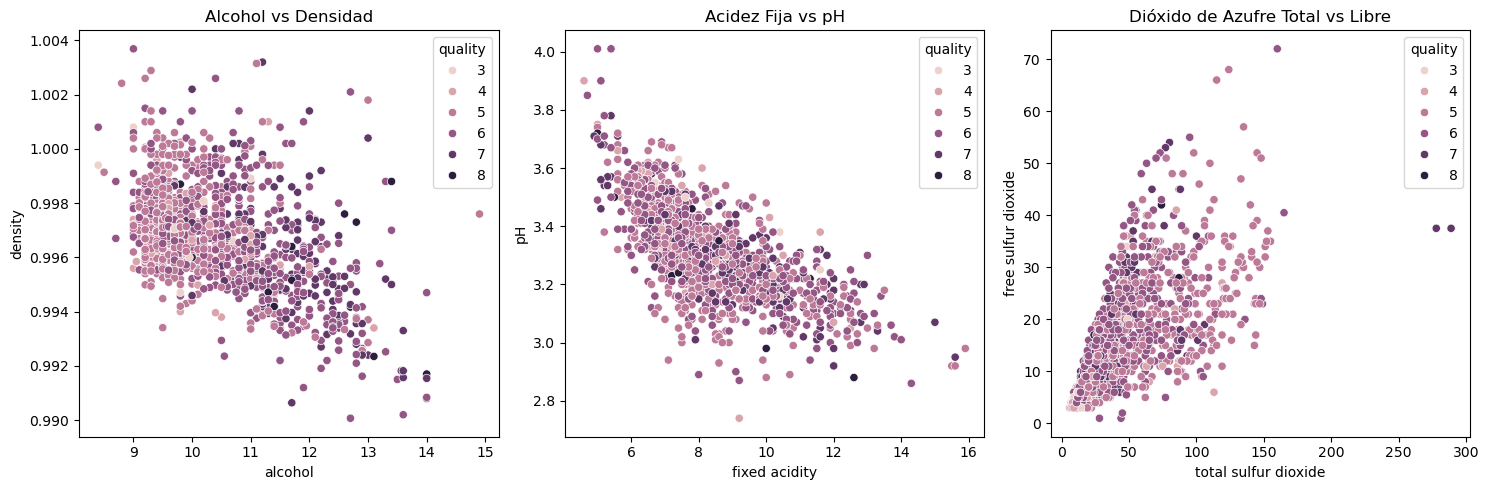

In [143]:
plt.figure(figsize=(12, 10))
correlation_matrix = dfr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
plt.close()

# Diagrama de dispersión para variables con alta correlación
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(x='alcohol', y='density', hue='quality', data=dfr)
plt.title('Alcohol vs Densidad')

plt.subplot(132)
sns.scatterplot(x='fixed acidity', y='pH', hue='quality', data=dfr)
plt.title('Acidez Fija vs pH')

plt.subplot(133)
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='quality', data=dfr)
plt.title('Dióxido de Azufre Total vs Libre')

plt.tight_layout()
plt.show()
plt.close()
    

Vino blanco

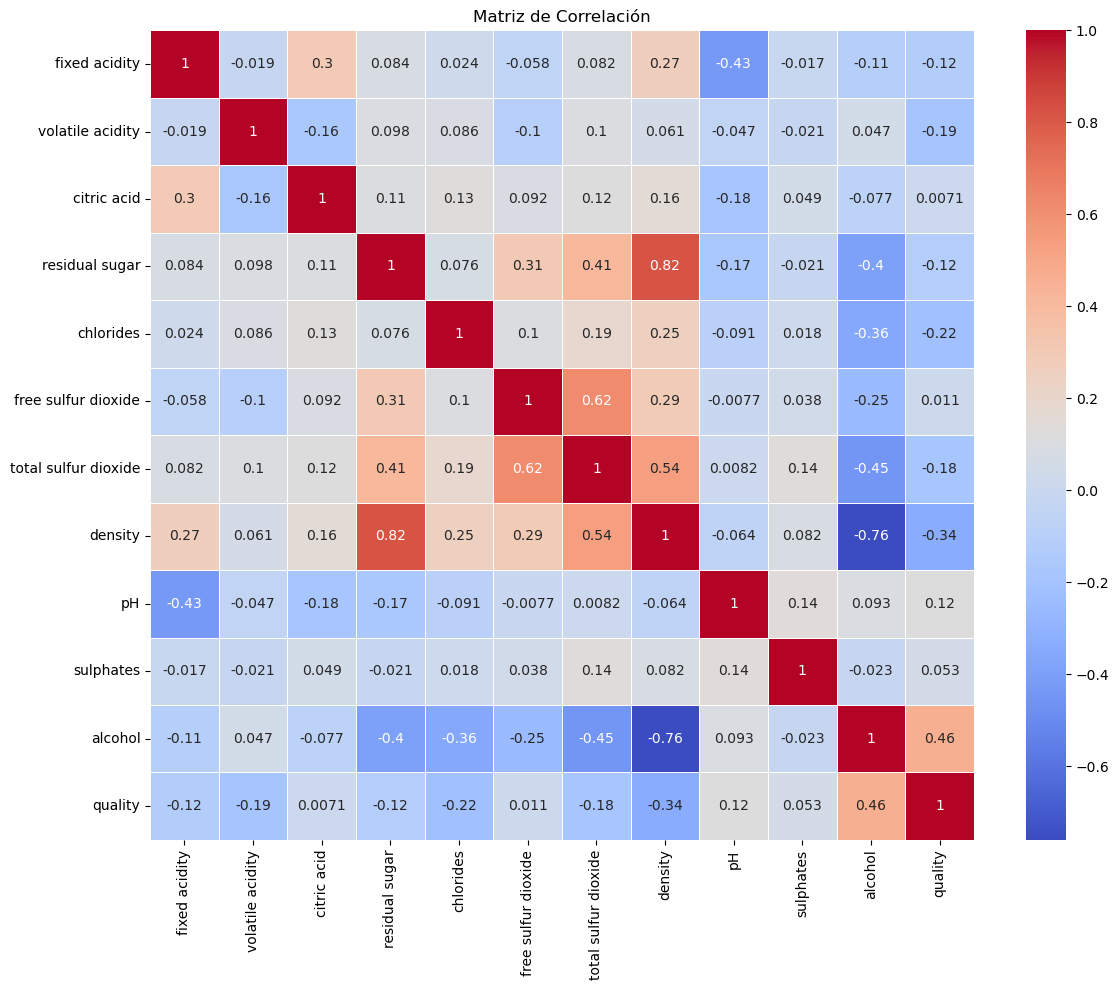

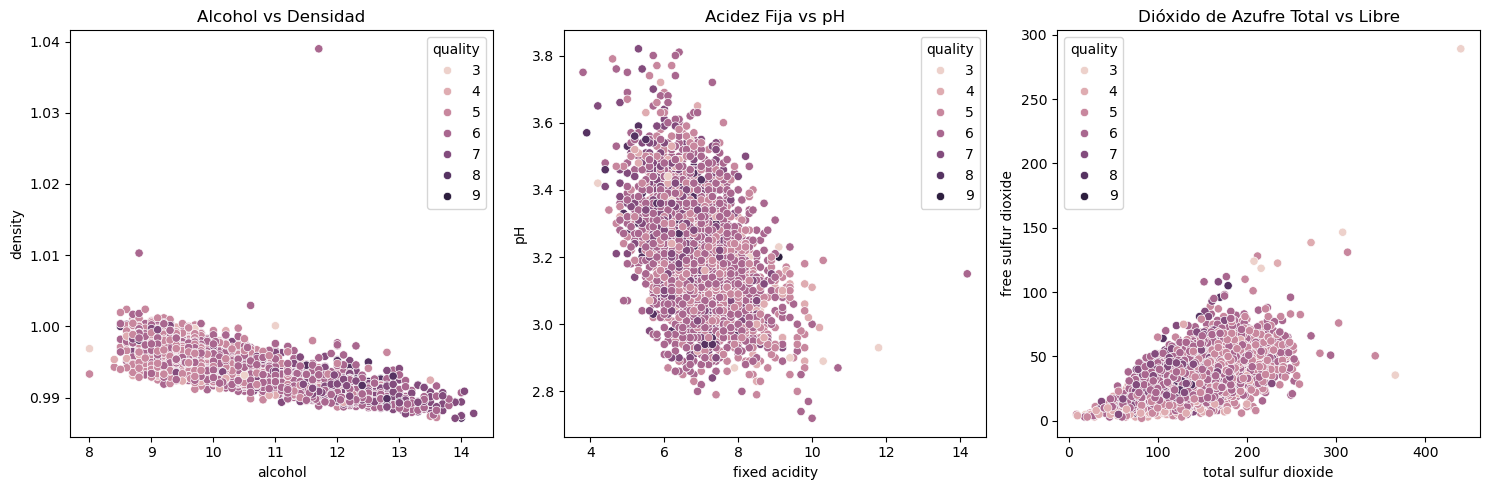

In [144]:
plt.figure(figsize=(12, 10))
correlation_matrix = dfb.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
plt.close()

# Diagrama de dispersión para variables con alta correlación
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(x='alcohol', y='density', hue='quality', data=dfb)
plt.title('Alcohol vs Densidad')

plt.subplot(132)
sns.scatterplot(x='fixed acidity', y='pH', hue='quality', data=dfb)
plt.title('Acidez Fija vs pH')

plt.subplot(133)
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='quality', data=dfb)
plt.title('Dióxido de Azufre Total vs Libre')

plt.tight_layout()
plt.show()
plt.close()

# Implementacion de modelos

* Preparacion de datos para modelado

In [145]:
# Vino Rojo
X = dfr.drop('quality', axis=1)
y = dfr['quality']

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vino Blanco
X2 = dfb.drop('quality', axis=1)
y2 = dfb['quality']

# Separar datos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
    

* Entrenamiento de modelos

Vino rojo

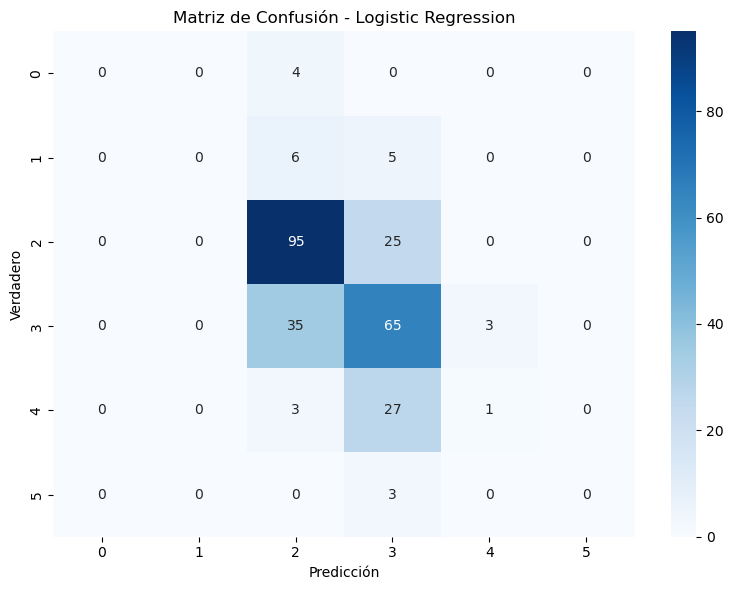

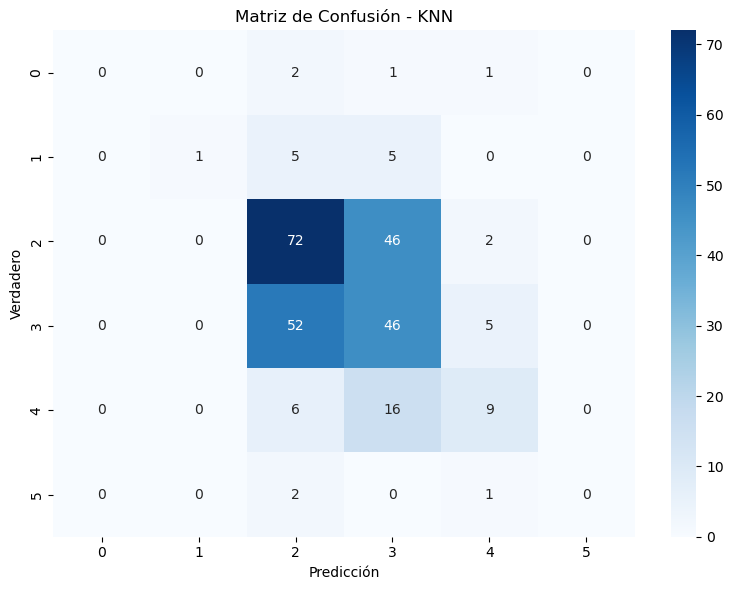


Resultados de los Modelos: (Dataset Vino Rojo)

Logistic Regression:
accuracy: 0.5919117647058824
precision: 0.5184936754422049
recall: 0.5919117647058824
f1_score: 0.5411452718970318

KNN:
accuracy: 0.47058823529411764
precision: 0.47874881209583414
recall: 0.47058823529411764
f1_score: 0.4544391099944773


In [146]:
results = {}
    
# Logistic Regression
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_predictions),
    'precision': precision_score(y_test, lr_predictions, average='weighted'),
    'recall': recall_score(y_test, lr_predictions, average='weighted'),
    'f1_score': f1_score(y_test, lr_predictions, average='weighted')
}

# Crear matriz de confusión para Logistic Regression
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()
plt.close()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

results['KNN'] = {
    'accuracy': accuracy_score(y_test, knn_predictions),
    'precision': precision_score(y_test, knn_predictions, average='weighted'),
    'recall': recall_score(y_test, knn_predictions, average='weighted'),
    'f1_score': f1_score(y_test, knn_predictions, average='weighted')
}

# Crear matriz de confusión para KNN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()
plt.close()

print("\nResultados de los Modelos: (Dataset Vino Rojo)")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Vino blanco

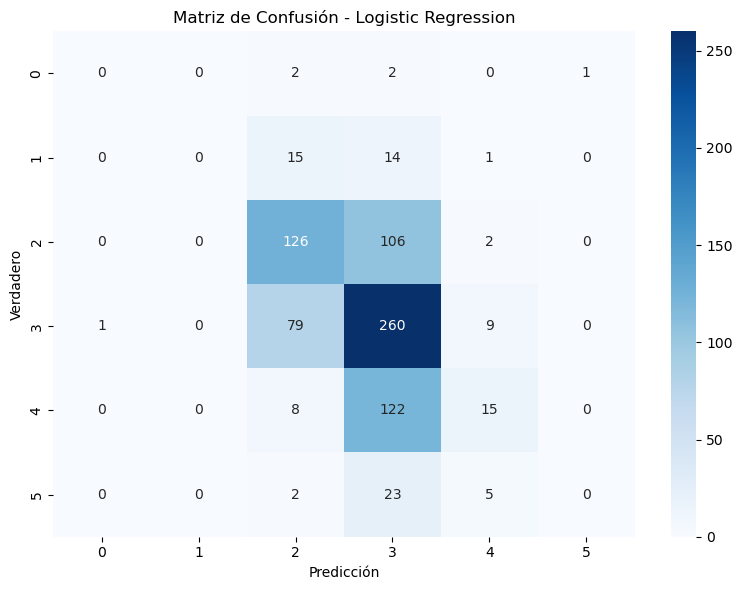

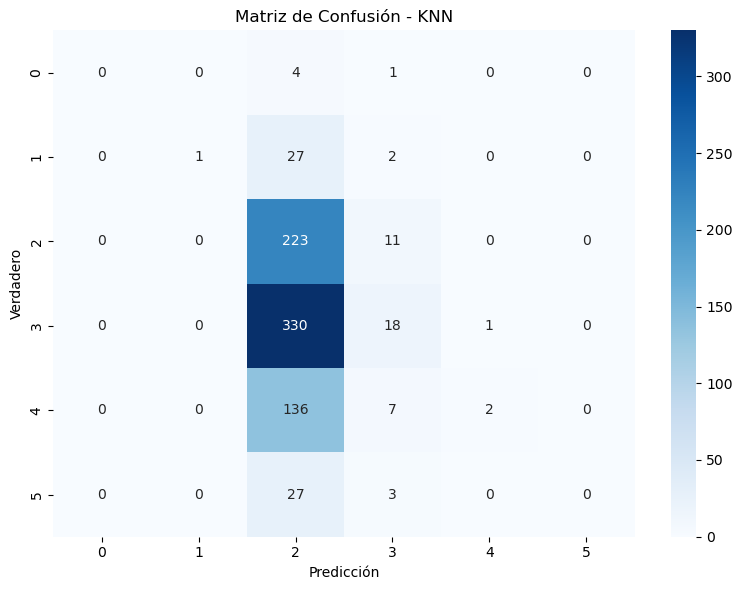


Resultados de los Modelos (Dataset Vino Blanco):

Logistic Regression:
accuracy: 0.5056746532156369
precision: 0.46309851208626424
recall: 0.5056746532156369
f1_score: 0.4518108366838827

KNN:
accuracy: 0.3076923076923077
precision: 0.4364357086063584
recall: 0.3076923076923077
f1_score: 0.1820589107417022


In [147]:
results = {}
    
# Logistic Regression
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train2, y_train2)
lr_predictions = lr_model.predict(X_test2)

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test2, lr_predictions),
    'precision': precision_score(y_test2, lr_predictions, average='weighted'),
    'recall': recall_score(y_test2, lr_predictions, average='weighted'),
    'f1_score': f1_score(y_test2, lr_predictions, average='weighted')
}

# Crear matriz de confusión para Logistic Regression
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test2, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()
plt.close()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test2)

results['KNN'] = {
    'accuracy': accuracy_score(y_test2, knn_predictions),
    'precision': precision_score(y_test2, knn_predictions, average='weighted'),
    'recall': recall_score(y_test2, knn_predictions, average='weighted'),
    'f1_score': f1_score(y_test2, knn_predictions, average='weighted')
}

# Crear matriz de confusión para KNN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test2, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()
plt.close()

print("\nResultados de los Modelos (Dataset Vino Blanco):")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

* De acuerdo a la evaluacion anterior, el modelo que mejor rendimiento da es el Logistic Regression para ambos datasets